# PS 3 - Part 1: Identification strategy of Cloyne and Ḧurtgen (2016)

Cloyne and Hürtgen (2016) identify monetary policy shocks for the UK by carrying out the following regression:

$$
\begin{equation}

    \begin{split}
    \Delta i_m = & \alpha  + \beta i_{t-d14} + \sum_{j=-1}^2 \gamma_j \hat{y}_{m,j}^F + \varphi_j \hat{\pi}_{m,j}^F \\
    &+ \delta \left( \hat{y}_{m,j}^F - \hat{y}_{m-1,j}^F \right) + \delta \left( \hat{\pi}_{m,j}^F - \hat{\pi}_{m-1,j}^F \right) + \sum_{j=1}^3 \rho_j u_{t-j} + \epsilon_m
    \end{split}
\end{equation}
$$


where the subscript $m$ descries the measurement at meeting-by-meeting frequency, the subscriptj denotes the quarter of the forecast relative to the meeting date and the superscript $F$ indicates that the variables are forecasts.

The variables used in the regression are the following


- $\Delta i_m$: change in the intended policy target around the policy decision (FDBRD14).
- $i_{t-d14}$: interest rates two weeks before the meeting (RateD14).
- $\hat{y}_{m,j}^F$: real GDP growth (RGDP) forecasted for the current period (NIRGDP0) as well as one and two quarters ahead (NIRGDP1, NIRGDP2) and real-time backdata of the previous period and the forecast for the current period (NIRGDPM1).
- $\hat{\pi}_{m,j}^F$: Inflation (IRINFL) forecasted for the current period (NIRINFL0) as well as one and two quarters ahead (NINFLT1, NINFLT2) and real-time backdata of the previous period and the forecast for the current period (NIRINFLM1).
- $\hat{y}_{m,j}^F - \hat{y}_{m-1,j}^F$: revisions in the forecasts relative to the previous round of forecasts (NIRDGDPx, NIRDINFLx, with $x\in\{M1,0,1,2\}$). 
- $u_{t-j}$: unemployment rates of the previous three months (UNEMPMj with $j\in{1,2,3}$)


If the variable in the dataset is followed by $Mt$, this indicates that the data is real-time data from $t$ period ago. If the variable is only followed by $t$ the data is a forecast $t$ periods ahead.

Tasks:
1. Load the provided data file “stage1Data.xlsx”.
2. Do the appropriate data manipulations and construct the vector of regressors X, and dependent variable Y.
3. Discuss how this regression helps us to construct a series of valid shocks.
4. Plot the Monetary Policy shocks obtained previously.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Load the data

In [2]:
data = pd.read_excel('data/stage1Data.xlsx')

# specify the columns to select from the original dataset
select_columns = [
    'Date  Rate Changed', # Date of the meeting
    'FDBRD14',  # Change in intended policy target around the policy decision
    'RateD14', # Interest rates two weeks before the meeting
    'NIRGDP0', 'NIRGDP1', 'NIRGDP2', 'NIRGDPM1', # real GDP growth (forecasted and real-time data)
    'NIRINFL0', 'NIRINFL1', 'NIRINFL2', 'NIRINFLM1', # Inflation (forecasted and real-time data)
    'NIRDGDP0', 'NIRDGDP1', 'NIRDGDP2', 'NIRDGDPM1', # revisions in the forecasts relative to the previous round of forecasts for GDP growth
    'NIRDINFL0', 'NIRDINFL1', 'NIRDINFL2', 'NIRDINFLM1', # revisions in the forecasts relative to the previous round of forecasts for inflation
    'UNEMPM1', 'UNEMPM2', 'UNEMPM3', # Unemployment rates of the previous three months
]
# select specified columns and drop rows with missing values
data = data[select_columns].dropna()

data.head(-5)

,Date Rate Changed,FDBRD14,RateD14,NIRGDP0,NIRGDP1,NIRGDP2,NIRGDPM1,NIRINFL0,NIRINFL1,NIRINFL2,...,NIRDGDP1,NIRDGDP2,NIRDGDPM1,NIRDINFL0,NIRDINFL1,NIRDINFL2,NIRDINFLM1,UNEMPM1,UNEMPM2,UNEMPM3
3,1975-03-10,-0.25,10.50,5.163853,-1.960784,2.364532,-1.188119,17.062315,17.338995,18.707015,...,-6.384747,4.187686,-3.764016,-1.988834,-2.252266,-3.339688,-0.077160,4.0,3.9,3.8
4,1975-04-21,-0.25,10.00,-1.960784,2.364532,1.175318,5.163853,17.338995,18.707015,18.940397,...,4.187686,-1.388784,8.454529,-2.252266,-3.339688,-3.561257,-1.988834,4.1,4.0,3.9
5,1975-07-28,1.00,10.00,3.190429,2.769535,3.536346,-1.192843,21.614227,21.848185,20.501567,...,1.594217,1.973846,0.767941,2.907212,2.907787,2.440731,3.791747,4.5,4.3,4.2
6,1975-10-06,1.00,11.00,2.448980,4.056795,0.000000,-0.407747,22.112211,20.050283,13.715278,...,0.520449,-1.947420,-3.598176,0.264026,-0.451285,-2.854150,1.367989,4.8,4.7,4.6
7,1975-11-17,-0.25,12.00,2.448980,4.056795,0.000000,-0.407747,22.112211,20.050283,13.715278,...,0.520449,-1.947420,-3.598176,0.264026,-0.451285,-2.854150,1.367989,4.9,4.8,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,2007-03-08,0.00,5.25,3.293492,3.147092,2.948993,3.483239,2.900454,2.564299,2.243625,...,0.188599,0.094067,0.214018,0.225297,0.199488,0.185784,0.139029,5.5,5.6,5.5
229,2007-04-05,0.00,5.25,3.147092,2.948993,2.859851,3.293492,2.564299,2.243625,2.016994,...,0.094067,-0.038344,0.237752,0.199488,0.185784,-0.012734,0.225297,5.5,5.5,5.6
230,2007-05-10,0.25,5.25,3.145252,2.965305,3.006726,3.547239,2.515620,2.252000,2.062000,...,0.016312,0.146875,0.253746,-0.048678,0.008376,0.045006,-0.038635,5.4,5.5,5.5
231,2007-06-07,0.00,5.50,3.145252,2.965305,3.006726,3.547239,2.515620,2.252000,2.062000,...,0.016312,0.146875,0.253746,-0.048678,0.008376,0.045006,-0.038635,5.4,5.4,5.5


# 2. Run OLS regression and extract shocks

In [3]:
# Using formulas to run regressions: https://www.statsmodels.org/dev/example_formulas.html
formula = 'FDBRD14 ~ UNEMPM3 + UNEMPM2' # NOTE: an intercept is added as a default
print('formula:', formula)
# set up the regresion model
model = sm.OLS.from_formula(formula, data=data)
# fit the model
results = model.fit()
# print the summary of the regression results
print(results.summary())


formula: FDBRD14 ~ UNEMPM3 + UNEMPM2
                            OLS Regression Results                            
Dep. Variable:                FDBRD14   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     7.927
Date:                Fri, 09 May 2025   Prob (F-statistic):           0.000468
Time:                        09:43:58   Log-Likelihood:                -230.43
No. Observations:                 235   AIC:                             466.9
Df Residuals:                     232   BIC:                             477.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      

In [4]:
data_with_intercept = sm.add_constant(data) # add intercept to the data
indep_vars = ['const', 'UNEMPM3'] # independent variables
dep_var = 'FDBRD14' # dependent variable

model = sm.OLS(endog=data_with_intercept[dep_var], exog=data_with_intercept[indep_vars])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                FDBRD14   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     6.424
Date:                Fri, 09 May 2025   Prob (F-statistic):             0.0119
Time:                        09:43:58   Log-Likelihood:                -235.00
No. Observations:                 235   AIC:                             474.0
Df Residuals:                     233   BIC:                             480.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2910      0.136      2.134      0.0

In [5]:
# define regression formula
indep_var = 'FDBRD14'
# filter out the date columns as they are not allowed in the regression (could also be set as the index columns)
dep_vars = [v for v in select_columns if v not in [indep_var, 'Date  Rate Changed']]
# create the formula for the regression 
formula = f'{indep_var} ~ {" + ".join(dep_vars)}' # the join command concatenates the variables with a plus sign
# alternatively, the formula can be written as:
# formula = f'{indep_var} ~ RateD14 + NIRGDP0 + NIRGDP1 + NIRGDP2 + NIRGDPM1 + NIRINFL0 + NIRINFL1 + NIRINFL2 + NIRINFLM1 + NIRDGDP0 + NIRDGDP1 + NIRDGDP2 + NIRDGDPM1 + NIRDINFL0 + NIRDINFL1 + NIRDINFL2 + NIRDINFLM1 + UNEMPM1 + UNEMPM2 + UNEMPM3'
print("Formula: ", formula)
# set up the regresion model
model = sm.OLS.from_formula(formula, data=data)
# fit the model
results = model.fit()
print(results.summary())

Formula:  FDBRD14 ~ RateD14 + NIRGDP0 + NIRGDP1 + NIRGDP2 + NIRGDPM1 + NIRINFL0 + NIRINFL1 + NIRINFL2 + NIRINFLM1 + NIRDGDP0 + NIRDGDP1 + NIRDGDP2 + NIRDGDPM1 + NIRDINFL0 + NIRDINFL1 + NIRDINFL2 + NIRDINFLM1 + UNEMPM1 + UNEMPM2 + UNEMPM3
                            OLS Regression Results                            
Dep. Variable:                FDBRD14   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.399
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.42e-08
Time:                        09:43:58   Log-Likelihood:                -197.73
No. Observations:                 235   AIC:                             437.5
Df Residuals:                     214   BIC:                             510.1
Df Model:                          20                                         
Covariance Type:            nonrobust              

In [6]:
# An alternative to using the formula is to create datasets with the dependent and independent variables separately
dep_var = 'FDBRD14'
data_with_intercept = sm.add_constant(data)
indep_vars = ['const', 'RateD14', 'NIRGDP0', 'NIRGDP1', 'NIRGDP2', 'NIRGDPM1', 'NIRINFL0', 'NIRINFL1', 'NIRINFL2', 'NIRINFLM1', 'NIRDGDP0', 'NIRDGDP1', 'NIRDGDP2', 'NIRDGDPM1', 'NIRDINFL0', 'NIRDINFL1', 'NIRDINFL2', 'NIRDINFLM1', 'UNEMPM1', 'UNEMPM2', 'UNEMPM3']

model = sm.OLS(endog=data_with_intercept[dep_var], exog=data_with_intercept[indep_vars])
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                FDBRD14   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     4.399
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.42e-08
Time:                        09:43:58   Log-Likelihood:                -197.73
No. Observations:                 235   AIC:                             437.5
Df Residuals:                     214   BIC:                             510.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1772      0.279     -0.634      0.5

In [7]:
# extract residuals
shocks = results.resid
# add dates as index to the series (usefull for resampling and plotting)
dates = data['Date  Rate Changed']
shocks.index = pd.to_datetime(dates)

# 4. Plot the shocks

In [8]:
data.head()

,Date Rate Changed,FDBRD14,RateD14,NIRGDP0,NIRGDP1,NIRGDP2,NIRGDPM1,NIRINFL0,NIRINFL1,NIRINFL2,...,NIRDGDP1,NIRDGDP2,NIRDGDPM1,NIRDINFL0,NIRDINFL1,NIRDINFL2,NIRDINFLM1,UNEMPM1,UNEMPM2,UNEMPM3
3,1975-03-10,-0.25,10.5,5.163853,-1.960784,2.364532,-1.188119,17.062315,17.338995,18.707015,...,-6.384747,4.187686,-3.764016,-1.988834,-2.252266,-3.339688,-0.077160,4.0,3.9,3.8
4,1975-04-21,-0.25,10.0,-1.960784,2.364532,1.175318,5.163853,17.338995,18.707015,18.940397,...,4.187686,-1.388784,8.454529,-2.252266,-3.339688,-3.561257,-1.988834,4.1,4.0,3.9
5,1975-07-28,1.00,10.0,3.190429,2.769535,3.536346,-1.192843,21.614227,21.848185,20.501567,...,1.594217,1.973846,0.767941,2.907212,2.907787,2.440731,3.791747,4.5,4.3,4.2
6,1975-10-06,1.00,11.0,2.448980,4.056795,0.000000,-0.407747,22.112211,20.050283,13.715278,...,0.520449,-1.947420,-3.598176,0.264026,-0.451285,-2.854150,1.367989,4.8,4.7,4.6
7,1975-11-17,-0.25,12.0,2.448980,4.056795,0.000000,-0.407747,22.112211,20.050283,13.715278,...,0.520449,-1.947420,-3.598176,0.264026,-0.451285,-2.854150,1.367989,4.9,4.8,4.7


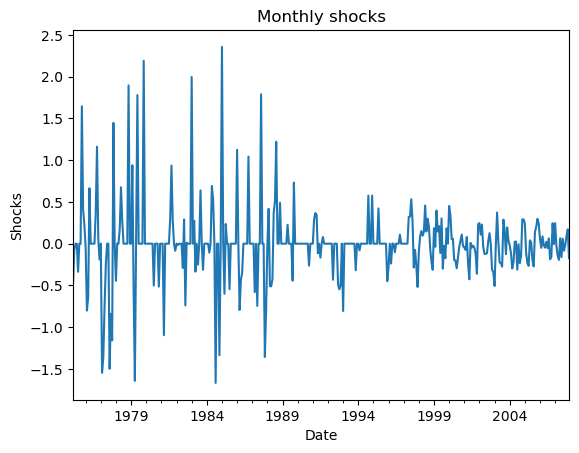

In [9]:
# Dates are daily at the dates of policy changes. 
# We want zeros in months with no policy changes and the sum of policy changes if there were multiple in a month.
shocks_monthly = shocks.resample("ME").sum()
# Plot the shocks
shocks_monthly.plot(xlabel='Date', ylabel='Shocks', title='Monthly shocks').get_figure().savefig('saves/shocks.png')

In [10]:
# save the plot
# plt.savefig('shocks.pdf')

In [11]:
# compare to results from cloyne and hürtgen
data_orig = pd.read_excel('data/monthlyShocks.xlsx')
shocks_orig = data_orig['Assigned to months']
shocks_orig.index = data_orig['Date']
shocks_orig = shocks_orig.dropna()

pd.concat([shocks_monthly, shocks_orig], axis=1)

,0,Assigned to months
1975-01-31,NaN,0.000000
1975-02-28,NaN,0.000000
1975-03-31,-0.489926,-0.489926
1975-04-30,-0.076358,-0.076358
1975-05-31,0.000000,0.000000
...,...,...
2007-08-31,-0.083612,-0.083612
2007-09-30,-0.017736,-0.017736
2007-10-31,0.090851,0.090851
2007-11-30,0.172033,0.172033
